# Recuperación de Información (Information Retrieval)


## Conceptos básicos

### <u>Documentos</u>

En nuestro curso nos limitaremos a la recuperación de información en colecciones de textos a los cuales llamaremos <b>documentos</b>


In [ ]:
# algunos ejemplos de documentos básicos que pueden
#ser representados como cadenas de caracteres

d1 = "... Las habilidades que los niños necesitan en relación\
 con los medios digitales no se limitan a la recuperación de información ..."
d2 = "... como el procesamiento de datos, el desarrollo y la recuperación de información\
 son ejemplos de posibles áreas de cambio ..."
d3 = "... la enumeración de varios nombres puede aumentar las probabilidades de recuperación ..."
d4 = "... Usar estructuras cognitivas facilita la recuperación y la actualización de\
 las bases de conocimiento a través de los puntos clave ..."
d5 = "... en su defecto la fecha de efectos aplicada en ausencia de otra información\
 fue la de solicitud ..."

### <u>Colección</u>

Llamaremos <b>colección</b> a un conjunto de documentos. Observa que los documentos d1, d2, d3, d4 y d5 forman una colección

In [ ]:
#podemos formar la colección de documentos mediante un diccionario
colecc = {'d1':d1, 'd2':d2, 'd3':d3, 'd4':d4, 'd5':d5}

In [ ]:
print(colecc['d2'])

... como el procesamiento de datos, el desarrollo y la recuperación de información son ejemplos de posibles áreas de cambio ...




### <u> Bolsa de palabras</u>

Una documento puede representarse como una <b>bolsa de palabras</b>. Básicamente es un conjunto que contiene a cada palabra presente en el documento. Con esta representación se pierde la información correspondiente al orden en el cual se presentan las palabras en un documento.

A las palabras también se les conoce como <b>términos</b>

In [ ]:
# construcción de la bolsa de palabras de un documento
sp = d2.split(" ") #suponemos que las palabras están separadas por espacios
bp = set(sp)

for e in bp:
    print(e)

el
procesamiento
como
y
posibles
datos,
...
la
desarrollo
recuperación
de
información
áreas
cambio
son
ejemplos


Podemos definir una función que construya la bolsa de palabras de un documento
ya que es un proceso que se utilizará con frecuencia


In [ ]:
# Primera versión
def bag_of_words(d): #recibe un documento cualquiera
    #removemos algunos signos de puntuación
    sigs = [',', '.', ':', ';']
    dc = d
    for s in sigs:
        dc = dc.replace(s,"")

    #dividimos las palabras por medio de los espacios y las convertimos a minúsculas para uniformizar
    sp = dc.split(" ")
    bw = set(sp)
    bw = [w.lower() for w in bw]
    return bw

Podemos utilizar la función para extraer la bolsa de palabras de cualquier documento de la colección


In [ ]:
bw = bag_of_words(colecc['d1'])

for w in bw:
    print(w)



limitan
los
que
en
recuperación
a
relación
digitales
información
niños
no
necesitan
la
habilidades
las
se
con
medios
de


### <u>Vocabulario</u>

Conjunto de términos presentes en los documentos de una colección

In [ ]:
# construimos el vocabulario guardando en un conjunto los términos de
# todos los documentos en la colección

voc = set()

for d in colecc:
    bw = bag_of_words(colecc[d])
    voc = voc.union(bw)

for e in voc:
    print(e)


el
procesamiento
limitan
los
probabilidades
que
en
recuperación
áreas
aumentar
cambio
puntos
a
nombres
aplicada
relación
posibles
varios
estructuras
datos
su
fue
actualización
digitales
través
información
niños
ejemplos
conocimiento
facilita
las
defecto
no
necesitan
cognitivas
la
habilidades
y
se
como
usar
ausencia
fecha
con
medios
bases
desarrollo
otra
de
puede
clave
efectos
son
solicitud
enumeración


## Preprocesamiento



### <u> Stop Words</u>

Es una práctica común el ignorar palabras que aparecen con mucha frecuencia en los documentos y que pueden aportar muy poca información al proceso de búsqueda, por ejemplo: los artículos, las preposiciones, pronombres, conectivos, etc.

Por ejemplo, al construir la bolsa de palabras podríamos ignorar las siguientes: <b> son, en, el, la los, de, las, a, y, que,...</b> A dichas palabras se les conoce en inglés como <b>stop words</b>.

In [ ]:
#segunda versión
def bag_of_words(d):
    stop_words = ["son", "el", "la", "los", "de", "las", "a", "y", "que", "en", "se", "su", "fue", "no",
              "con", "como"]

    #removemos los signos de puntuación
    sigs = [',', '.', ':', ';']
    dc = d
    for s in sigs:
        dc = dc.replace(s,"")

    #dividimos las palabras por medio de los espacios
    sp = dc.split(" ")
    bw = set() #conjunto vacío

    #y agregamos cada palabra (en minúsculas)
    #a la bolsa siempre y cuando no sea una stop word
    for w in sp:
        nw = w.lower()
        #remueve algunos caracteres especiales que pueden estar presentes en las palabras
        nw = nw.replace(" ",'')
        nw = nw.replace("\n",'')
        nw = nw.replace('"','')
        nw = nw.replace('(','')
        nw = nw.replace(')','')
        if not nw in stop_words:
            bw.add(nw)

    return bw

In [ ]:
# construimos un vocabulario guardando en un conjunto los términos de
# todos los documentos en la colección

#una vez construido el vocabulario removemos las stop-words

voc = set()

for d in colecc:
    bw = bag_of_words(colecc[d])
    voc = voc.union(bw)

for e in voc:
    print(e)


procesamiento
limitan
probabilidades
recuperación
áreas
aumentar
cambio
nombres
aplicada
relación
posibles
varios
estructuras
datos
actualización
digitales
través
información
niños
conocimiento
ejemplos
facilita
defecto
necesitan
cognitivas
habilidades
usar
ausencia
fecha
medios
bases
desarrollo
otra
puede
clave
efectos
puntos
solicitud
enumeración


### <u>Acentos</u>

Para uniformizar las palabras, podemos excluir a los acentos (no siempre los autores respetan la ortografía).

In [ ]:
#tercera versión
def bag_of_words(d):
    stop_words = ["son", "el", "la", "los", "de", "las", "a", "y", "que", "en", "se", "su", "fue", "no",
              "con", "como"]

    #removemos los signos de puntuación y caracteres especiales
    sigs = [',', '.', ':', ';' " ", "\n",'"', '(', ')']
    dc = d
    for s in sigs:
        dc = dc.replace(s,"")

    #dividimos las palabras por medio de los espacios
    sp = dc.split(" ")
    bw = set() #conjunto vacío

    #y agregamos cada palabra (en minúsculas)
    #a la bolsa siempre y cuando no sea una stop word
    for w in sp:
        nw = w.lower()
        #remueve acentos
        nw = nw.replace('á','a')
        nw = nw.replace('é','e')
        nw = nw.replace('í','i')
        nw = nw.replace('ó','o')
        nw = nw.replace('ú','u')
        nw = nw.replace('ñ','n')
        if not nw in stop_words:
            bw.add(nw)

    return bw

Al uniformizar las palabras evitamos que diferentes versiones de un mismo término aparezcan en el vocabulario (algunas con acento, otras sin acento).

In [ ]:
voc = set()

for d in colecc:
    bw = bag_of_words(colecc[d])
    voc = voc.union(bw)

for e in voc:
    print(e)


procesamiento
limitan
probabilidades
enumeracion
aumentar
ninos
cambio
nombres
aplicada
posibles
varios
estructuras
datos
digitales
traves
ejemplos
conocimiento
facilita
informacion
defecto
necesitan
cognitivas
habilidades
relacion
usar
actualizacion
ausencia
fecha
medios
areas
bases
recuperacion
desarrollo
otra
puede
clave
efectos
puntos
solicitud


Es recomendable separar el preprocesameinto de la construcción de la bolsa de palabras:

In [ ]:
def pre_proceso(d):
  #convierte a minúsculas
  nw = d.lower()
  #elimina acentos, caracteres especiales o signos de puntuación
  nw = nw.replace("\n",'')
  nw = nw.replace('"','')
  nw = nw.replace('(','')
  nw = nw.replace(')','')
  nw = nw.replace('.','')
  nw = nw.replace(',','')
  nw = nw.replace(';','')
  nw = nw.replace(':','')
  nw = nw.replace('á','a')
  nw = nw.replace('é','e')
  nw = nw.replace('í','i')
  nw = nw.replace('ó','o')
  nw = nw.replace('ú','u')
  nw = nw.replace('ñ','n')

  return nw

def bag_of_words(d):
  stop_words = ["son", "el", "la", "los", "de", "las", "a", "y", "que", "en", "se", "su", "fue", "no",
            "con", "como", ""]

  #dividimos las palabras por medio de los espacios
  sp = d.split(" ")
  bw = set() #conjunto vacío

  #y agregamos cada palabra
  #a la bolsa siempre y cuando no sea una stop word
  for w in sp:
      if not w in stop_words:
          bw.add(w)

  return bw

def vocabulario(colecc):
  voc = set()

  for d in colecc:
      bw = bag_of_words(colecc[d])
      voc = voc.union(bw)
  return voc

In [ ]:
# preprocesamos cada documento de la colección
for d in colecc:
  colecc[d] = pre_proceso(colecc[d])

# formamos el vocabulario
voc = vocabulario(colecc)
colecc['d1']

' las habilidades que los ninos necesitan en relacion con los medios digitales no se limitan a la recuperacion de informacion '

## Consultas

Es una lista de términos que refleja la necesidad de información que tiene un usuario del sistema de recuperación de información.

Procesamos la frase escrita en la consulta de la misma forma que procesamos los documentos de la colección (construimos la bolsa de palabras):

In [ ]:
# ejemplo de consulta
qry = "Recuperación de la información"
qry = pre_proceso(qry)
bw = bag_of_words(qry)
for w in bw:
    print(w)

recuperacion
informacion


### <u>Modelo booleano</u>
A partir de los términos de la consulta debemos seleccionar los documentos que sean relevantes.



In [ ]:
# buscamos los documentos relevantes de acuerdo a la consulta

tr_inf = set()
#buscamos los documentos que contengan el término "información"
for d in colecc:
    if "informacion" in colecc[d]:
        tr_inf.add(d)

tr_rec = set()
#buscamos los documentos que contengan el término "recuperación"
for d in colecc:
    if "recuperacion" in colecc[d]:
        tr_rec.add(d)

print("Documentos que contienen el término 'información': ")
print(tr_inf)

print("Documentos que contienen el término 'recuperación': ")
print(tr_rec)

Documentos que contienen el término 'información': 
{'d5', 'd1', 'd2'}
Documentos que contienen el término 'recuperación': 
{'d3', 'd1', 'd2', 'd4'}


Los términos de la consulta pueden combinarse mediante operadores lógicos, por ejemplo

#### <u>Usando el conectivo AND</u>


In [ ]:
# Consulta "información" Y "recuperación"
print("Resultados: \n\n")
res = tr_inf.intersection(tr_rec)
for r in res:
    print(colecc[r])
    print("\n")

Resultados: 


 las habilidades que los ninos necesitan en relacion con los medios digitales no se limitan a la recuperacion de informacion 


 como el procesamiento de datos el desarrollo y la recuperacion de informacion son ejemplos de posibles areas de cambio 




El resultado de la consulta contiene solamente a los documentos d1 y d2

#### <u>Usando el conectivo OR</u>

In [ ]:
# Consulta "información" O "recuperación"
print("Resultados: \n\n")
res = tr_inf.union(tr_rec)
for r in res:
    print(colecc[r])
    print("\n")

Resultados: 


 las habilidades que los ninos necesitan en relacion con los medios digitales no se limitan a la recuperacion de informacion 


 la enumeracion de varios nombres puede aumentar las probabilidades de recuperacion 


 en su defecto la fecha de efectos aplicada en ausencia de otra informacion fue la de solicitud 


 como el procesamiento de datos el desarrollo y la recuperacion de informacion son ejemplos de posibles areas de cambio 


 usar estructuras cognitivas facilita la recuperacion y la actualizacion de las bases de conocimiento a traves de los puntos clave 




#### <u>Usando la *diferencia*</u>

In [ ]:
# Consulta "información" - "recuperación"
print("Resultados: \n\n")
res = tr_inf.difference(tr_rec)
for r in res:
    print(colecc[r])
    print("\n")

Resultados: 


 en su defecto la fecha de efectos aplicada en ausencia de otra informacion fue la de solicitud 




## Índice Invertido

Observa que para responder a una consulta hemos recorrido cada documento seleccionando aquellos que contengan algún término en particular. Esta estrategia es muy ineficiente sobre todo si consideramos que la colección puede llegar a contener miles, o hasta millones de documentos.  

Una mejor opción consiste en construir una tabla en la que coloquemos cada término del vocabulario en un renglón junto con la lista de documentos en los que el término aparece. A esta tabla se le conoce como <b>índice invertido</b>. Utilizando el índice invertido, para responder a una consulta solamente se debe buscar el término en el índice y una vez localizado se recupera la lista de documentos en los que aparece.

Este proceso es ventajoso cuando la magnitud del vocabulario es mucho menor que la cantidad de documentos de la colección.

In [ ]:
# construcción del índice invertido

ind_invrt = {}

#recorremos cada documento
for d in colecc:
    bw = bag_of_words(colecc[d])
    for t in bw:
        if not t in ind_invrt: # si el término no está en el índice construye una nueva entrada
            ind_invrt[t] = set([d])
        else:
            ind_invrt[t].add(d)

for t in ind_invrt:
    print(t, ind_invrt[t])

informacion {'d5', 'd1', 'd2'}
limitan {'d1'}
medios {'d1'}
necesitan {'d1'}
recuperacion {'d3', 'd1', 'd2', 'd4'}
digitales {'d1'}
habilidades {'d1'}
ninos {'d1'}
relacion {'d1'}
procesamiento {'d2'}
posibles {'d2'}
areas {'d2'}
datos {'d2'}
desarrollo {'d2'}
cambio {'d2'}
ejemplos {'d2'}
varios {'d3'}
probabilidades {'d3'}
enumeracion {'d3'}
aumentar {'d3'}
puede {'d3'}
nombres {'d3'}
facilita {'d4'}
usar {'d4'}
actualizacion {'d4'}
estructuras {'d4'}
cognitivas {'d4'}
bases {'d4'}
clave {'d4'}
traves {'d4'}
puntos {'d4'}
conocimiento {'d4'}
ausencia {'d5'}
fecha {'d5'}
defecto {'d5'}
otra {'d5'}
efectos {'d5'}
solicitud {'d5'}
aplicada {'d5'}


El índice invertido reduce la respuesta a la consulta a una simple lectura de un elemento de un diccionario.

In [ ]:
# Una consulta ahora puede ser realizada a través del índice

q = "informacion"

if q in ind_invrt.keys():
  res = ind_invrt[q] #simplemente leemos la lista de documentos en los que aparece el término

  #imprimimos la lista de documentos en los que está presente el término
  for d in res:
      print(colecc[d])
      print("\n")

 en su defecto la fecha de efectos aplicada en ausencia de otra informacion fue la de solicitud 


 las habilidades que los ninos necesitan en relacion con los medios digitales no se limitan a la recuperacion de informacion 


 como el procesamiento de datos el desarrollo y la recuperacion de informacion son ejemplos de posibles areas de cambio 




## Modelo vectorial

### <u>Frecuencia de término</u>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#cuenta las veces ue aparece un término en cada documento

def term_frequency(d, voc):
  bw = bag_of_words(d)
  tf = np.zeros(len(voc))
  for w in bw:
    if w in voc:
      i = voc.index(w)
      if i >= 0:
        tf[i] += 1
  return tf

**Representamos cada documento como un vector**

In [ ]:
voc = list(voc)
tf = term_frequency(colecc['d1'], voc)
tf = pd.Series(tf, index=voc)
tf

procesamiento     0.0
limitan           1.0
probabilidades    0.0
enumeracion       0.0
aumentar          0.0
ninos             1.0
cambio            0.0
nombres           0.0
aplicada          0.0
posibles          0.0
varios            0.0
estructuras       0.0
datos             0.0
digitales         1.0
traves            0.0
ejemplos          0.0
conocimiento      0.0
facilita          0.0
informacion       1.0
defecto           0.0
necesitan         1.0
cognitivas        0.0
habilidades       1.0
relacion          1.0
usar              0.0
actualizacion     0.0
ausencia          0.0
fecha             0.0
medios            1.0
areas             0.0
bases             0.0
recuperacion      1.0
desarrollo        0.0
otra              0.0
puede             0.0
clave             0.0
efectos           0.0
puntos            0.0
solicitud         0.0
dtype: float64

### <u>Frecuencia inversa de documento</u>

In [ ]:
idf = np.zeros(len(voc))

for w in voc:
  i = voc.index(w)
  for d in colecc:
    if colecc[d].find(w) >= 0:
      idf[i] += 1
N = len(voc)
S_idf = np.log(N/pd.Series(idf, index=voc))
S_idf

procesamiento     3.663562
limitan           3.663562
probabilidades    3.663562
enumeracion       3.663562
aumentar          3.663562
ninos             3.663562
cambio            3.663562
nombres           3.663562
aplicada          3.663562
posibles          3.663562
varios            3.663562
estructuras       3.663562
datos             3.663562
digitales         3.663562
traves            3.663562
ejemplos          3.663562
conocimiento      3.663562
facilita          3.663562
informacion       2.564949
defecto           3.663562
necesitan         3.663562
cognitivas        3.663562
habilidades       3.663562
relacion          3.663562
usar              3.663562
actualizacion     3.663562
ausencia          3.663562
fecha             3.663562
medios            3.663562
areas             3.663562
bases             3.663562
recuperacion      2.277267
desarrollo        3.663562
otra              3.663562
puede             3.663562
clave             3.663562
efectos           3.663562
p

In [ ]:
np.log(len(voc))

### <u>TF-IDF </u>
Representamos a cada documento con el producto del vector de frecuencia de término por el de frecuencia inversa de documento:

In [ ]:
tf = term_frequency(colecc['d5'], voc)
tf*S_idf #vector tf-idf

procesamiento     0.000000
limitan           0.000000
probabilidades    0.000000
enumeracion       0.000000
aumentar          0.000000
ninos             0.000000
cambio            0.000000
nombres           0.000000
aplicada          3.663562
posibles          0.000000
varios            0.000000
estructuras       0.000000
datos             0.000000
digitales         0.000000
traves            0.000000
ejemplos          0.000000
conocimiento      0.000000
facilita          0.000000
informacion       2.564949
defecto           3.663562
necesitan         0.000000
cognitivas        0.000000
habilidades       0.000000
relacion          0.000000
usar              0.000000
actualizacion     0.000000
ausencia          3.663562
fecha             3.663562
medios            0.000000
areas             0.000000
bases             0.000000
recuperacion      0.000000
desarrollo        0.000000
otra              3.663562
puede             0.000000
clave             0.000000
efectos           3.663562
p

In [ ]:
# aplicamos la transformación a cada documento
W = {}

for d in colecc:
  W[d] = term_frequency(colecc[d], voc)*S_idf

W['d1']

procesamiento     0.000000
limitan           3.663562
probabilidades    0.000000
enumeracion       0.000000
aumentar          0.000000
ninos             3.663562
cambio            0.000000
nombres           0.000000
aplicada          0.000000
posibles          0.000000
varios            0.000000
estructuras       0.000000
datos             0.000000
digitales         3.663562
traves            0.000000
ejemplos          0.000000
conocimiento      0.000000
facilita          0.000000
informacion       2.564949
defecto           0.000000
necesitan         3.663562
cognitivas        0.000000
habilidades       3.663562
relacion          3.663562
usar              0.000000
actualizacion     0.000000
ausencia          0.000000
fecha             0.000000
medios            3.663562
areas             0.000000
bases             0.000000
recuperacion      2.277267
desarrollo        0.000000
otra              0.000000
puede             0.000000
clave             0.000000
efectos           0.000000
p

### <u>Similitud entre *documentos*</u>

Evalúamos la similitud entre un par de documentos con el producto punto entre vectores:

In [ ]:
np.dot(W['d4'], W['d4'])

139.40278563729734

Similtud entre cada pareja de documentos:

In [ ]:
S = np.zeros((5,5))

for i in range(1,6):
  for j in range(1,6):
    S[i-1, j-1] = np.dot(W['d'+str(i)], W['d'+str(j)])

S

array([[105.71669904,  11.76491149,   5.18594629,   5.18594629,
          6.57896521],
       [ 11.76491149, 105.71669904,   5.18594629,   5.18594629,
          6.57896521],
       [  5.18594629,   5.18594629,  85.7160499 ,   5.18594629,
          0.        ],
       [  5.18594629,   5.18594629,   5.18594629, 139.40278564,
          0.        ],
       [  6.57896521,   6.57896521,   0.        ,   0.        ,
        100.53075275]])

Visualizamos en un mapa de calor:

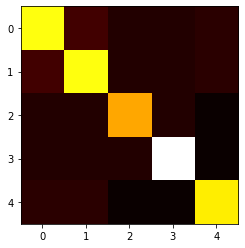

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(S, cmap='hot')
plt.show()

Si ignoramos la diagonal:

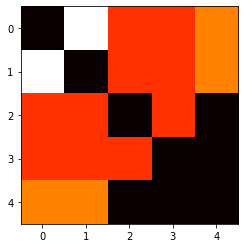

In [ ]:
plt.imshow(S-np.eye(5)*np.diag(S), cmap='hot')
plt.show()

In [ ]:
S-np.eye(5)*np.diag(S)

### <u> Consulta </u>

In [ ]:
qry = 'defecto ausencia fernando informacion'

tf_idf_qry = term_frequency(qry, voc)*S_idf
tf_idf_qry

procesamiento     0.000000
limitan           0.000000
probabilidades    0.000000
enumeracion       0.000000
aumentar          0.000000
ninos             0.000000
cambio            0.000000
nombres           0.000000
aplicada          0.000000
posibles          0.000000
varios            0.000000
estructuras       0.000000
datos             0.000000
digitales         0.000000
traves            0.000000
ejemplos          0.000000
conocimiento      0.000000
facilita          0.000000
informacion       2.564949
defecto           3.663562
necesitan         0.000000
cognitivas        0.000000
habilidades       0.000000
relacion          0.000000
usar              0.000000
actualizacion     0.000000
ausencia          3.663562
fecha             0.000000
medios            0.000000
areas             0.000000
bases             0.000000
recuperacion      0.000000
desarrollo        0.000000
otra              0.000000
puede             0.000000
clave             0.000000
efectos           0.000000
p

In [ ]:
rel = []
for i in range(1,6):
  sim = np.dot(tf_idf_qry, W['d'+str(i)])
  rel.append(sim)

pd.Series(rel, index = ['d'+str(i) for i in range(1,6)]).sort_values(ascending=False)

d5    33.422333
d1     6.578965
d2     6.578965
d3     0.000000
d4     0.000000
dtype: float64

## <font color="red"> Práctica </font>

* Forma una colección de documentos **preprocesando** los artículos de la revista *Information Architecture* disponibles en el directorio <u>information_architecture</u>. Nota: utiliza como stopwords las palabras disponibles en el archivo <u>stopwords.txt</u>
* Genera una nube de palabras con los términos de la colección formada.
* Construye la matriz tf-idf para los documentos de la colección. Puedes usar sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
* Investiga el concepto de *similitud coseno*.
* Identifica la pareja de artículos que tengan la mayor similitud coseno.
* Crea el índice invertido del vocabulario de la colección de artículos de la revista *Information Architecture*.